In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('output.xlsx')
data
features = data[['parimeter','area','circularity','aspect_ratio','convexity']]

In [3]:
from sklearn import preprocessing
feature_scaled = preprocessing.scale(features)
feature_scaled = pd.DataFrame(feature_scaled,columns=['parimeter','area','circularity','aspect_ratio','convexity'])
feature_scaled.head(10)

,parimeter,area,circularity,aspect_ratio,convexity
0,0.443617,-0.832718,-1.274185,-0.270846,-2.492002
1,-0.907738,-1.061117,-1.119288,-1.023401,-1.366789
2,1.596477,0.863925,0.061087,1.066585,0.033642
3,0.709486,0.981783,1.127111,0.903470,0.944568
4,-0.979417,-1.074770,-1.117901,-1.210184,-1.258330
5,0.821082,1.096296,1.127251,1.037692,0.912867
6,0.689292,0.926387,1.078635,0.920882,0.949801
7,-1.029038,-0.843934,-0.269666,-0.501371,0.095101
8,0.708715,1.078477,1.261041,1.002327,1.027812
9,-1.001375,-1.064744,-1.068497,-1.102664,-1.468517


In [6]:
kmeans = KMeans(n_clusters=3).fit(feature_scaled)
cluster_labels = kmeans.labels_

# Add the cluster labels as a new column in the DataFrame
data['Cluster_Labels'] = cluster_labels

# Save the DataFrame with the cluster labels back to the Excel file
data.to_excel('output.xlsx', index=False)

cluster_labels

array([0, 0, 1, 1, 0, 1, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 1, 0, 2, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0,
       2, 1, 2, 2, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0, 1, 0, 2, 0, 2, 2, 1, 1,
       0, 0, 0, 1, 1, 2, 2, 1, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2, 2, 0, 2, 0, 2, 2, 1, 1, 1, 2, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0, 1, 0, 1, 2,
       1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1],
      dtype=int32)

 - This is a try to find the best number of clusters in this task when we don't know how many clusters we want.

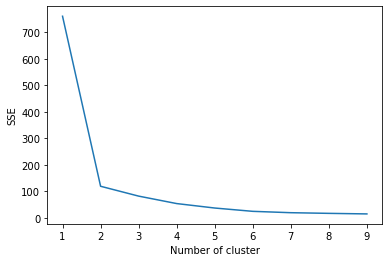

In [5]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(feature_scaled)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### To do: 

1. Some images in DSLR are a little vague, hope you can retake them.

2. We need the tags for all the images.

3. next step is to proceed the keyence image.
